In [1]:
import string
import seaborn as sns
import matplotlib.pyplot as plt

import interpret

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
def group_by_filename(args):
    filename = args['out']
    filename = filename.replace("\\", "/").split("/")[-1].split(".")[0].split("-")
    short_names = [p[0] + p[-1] for p in filename if p[0] in string.ascii_uppercase]
    return '-'.join(short_names)


groupped_results = interpret.import_from_dir("../results/comb/", group_by_filename)
results_df = interpret.convert_to_dataframe(groupped_results)

In [3]:
results_df["comb_size"] = results_df.group.str.count('1')
comb_sizes = results_df["comb_size"].unique()

In [4]:
end_results = results_df[results_df.gen == results_df.gen.max()].copy()
end_results["gen_time_s"] = end_results["time_s"] / end_results["gen"].max()

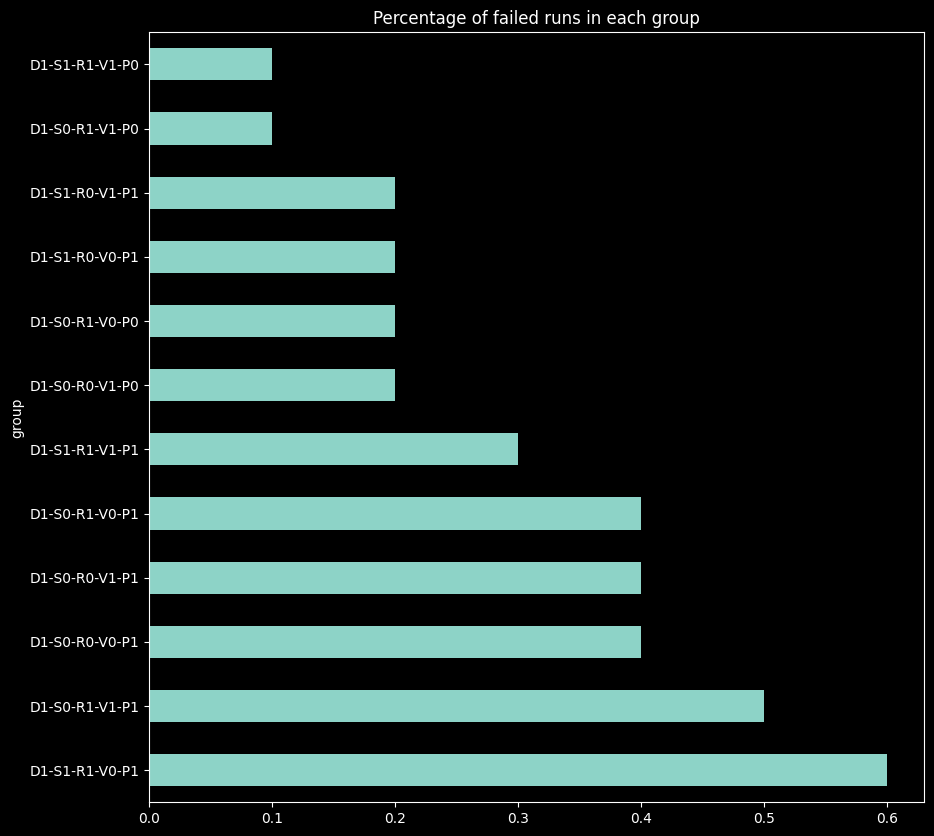

In [15]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
droprate = (end_results.run_idx.max() + 1) - end_results.groupby("group")['run_idx'].count()
droprate = droprate / (end_results.run_idx.max() + 1)
droprate = droprate[droprate > 0]
droprate = droprate.sort_values(ascending=False).plot(kind='barh', ax=ax)
plt.title("Percentage of failed runs in each group")
plt.show()

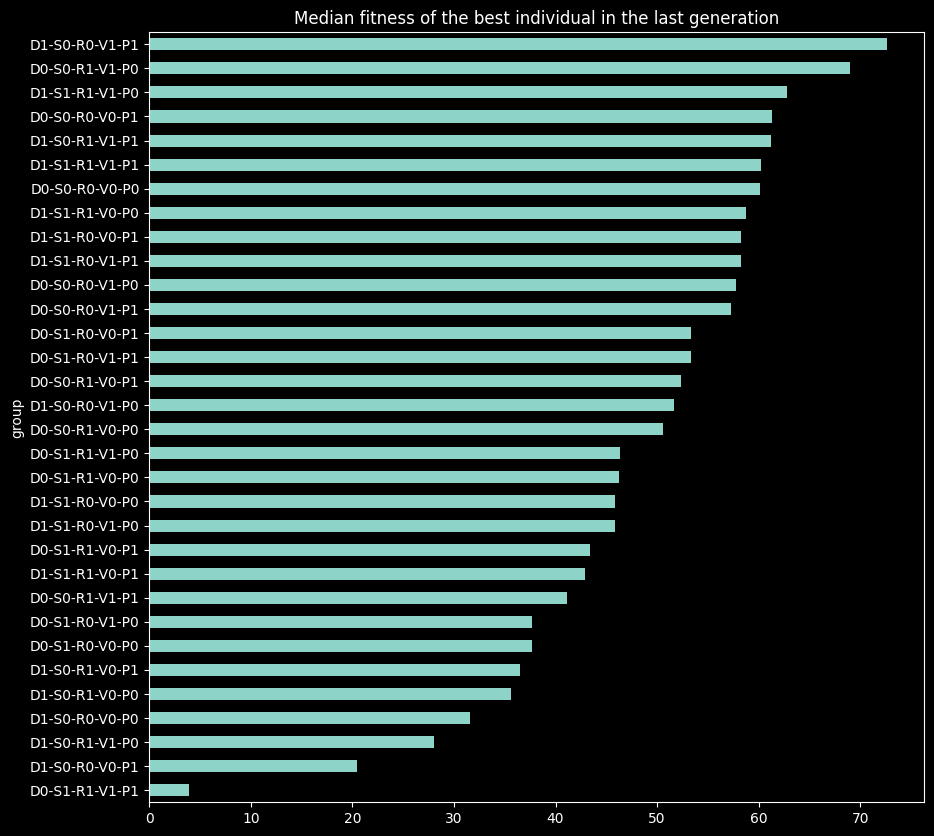

In [16]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
end_results.groupby("group")["max"].median().sort_values(ascending=True).plot(kind='barh', ax=ax)
plt.title("Median fitness of the best individual in the last generation")
plt.show()

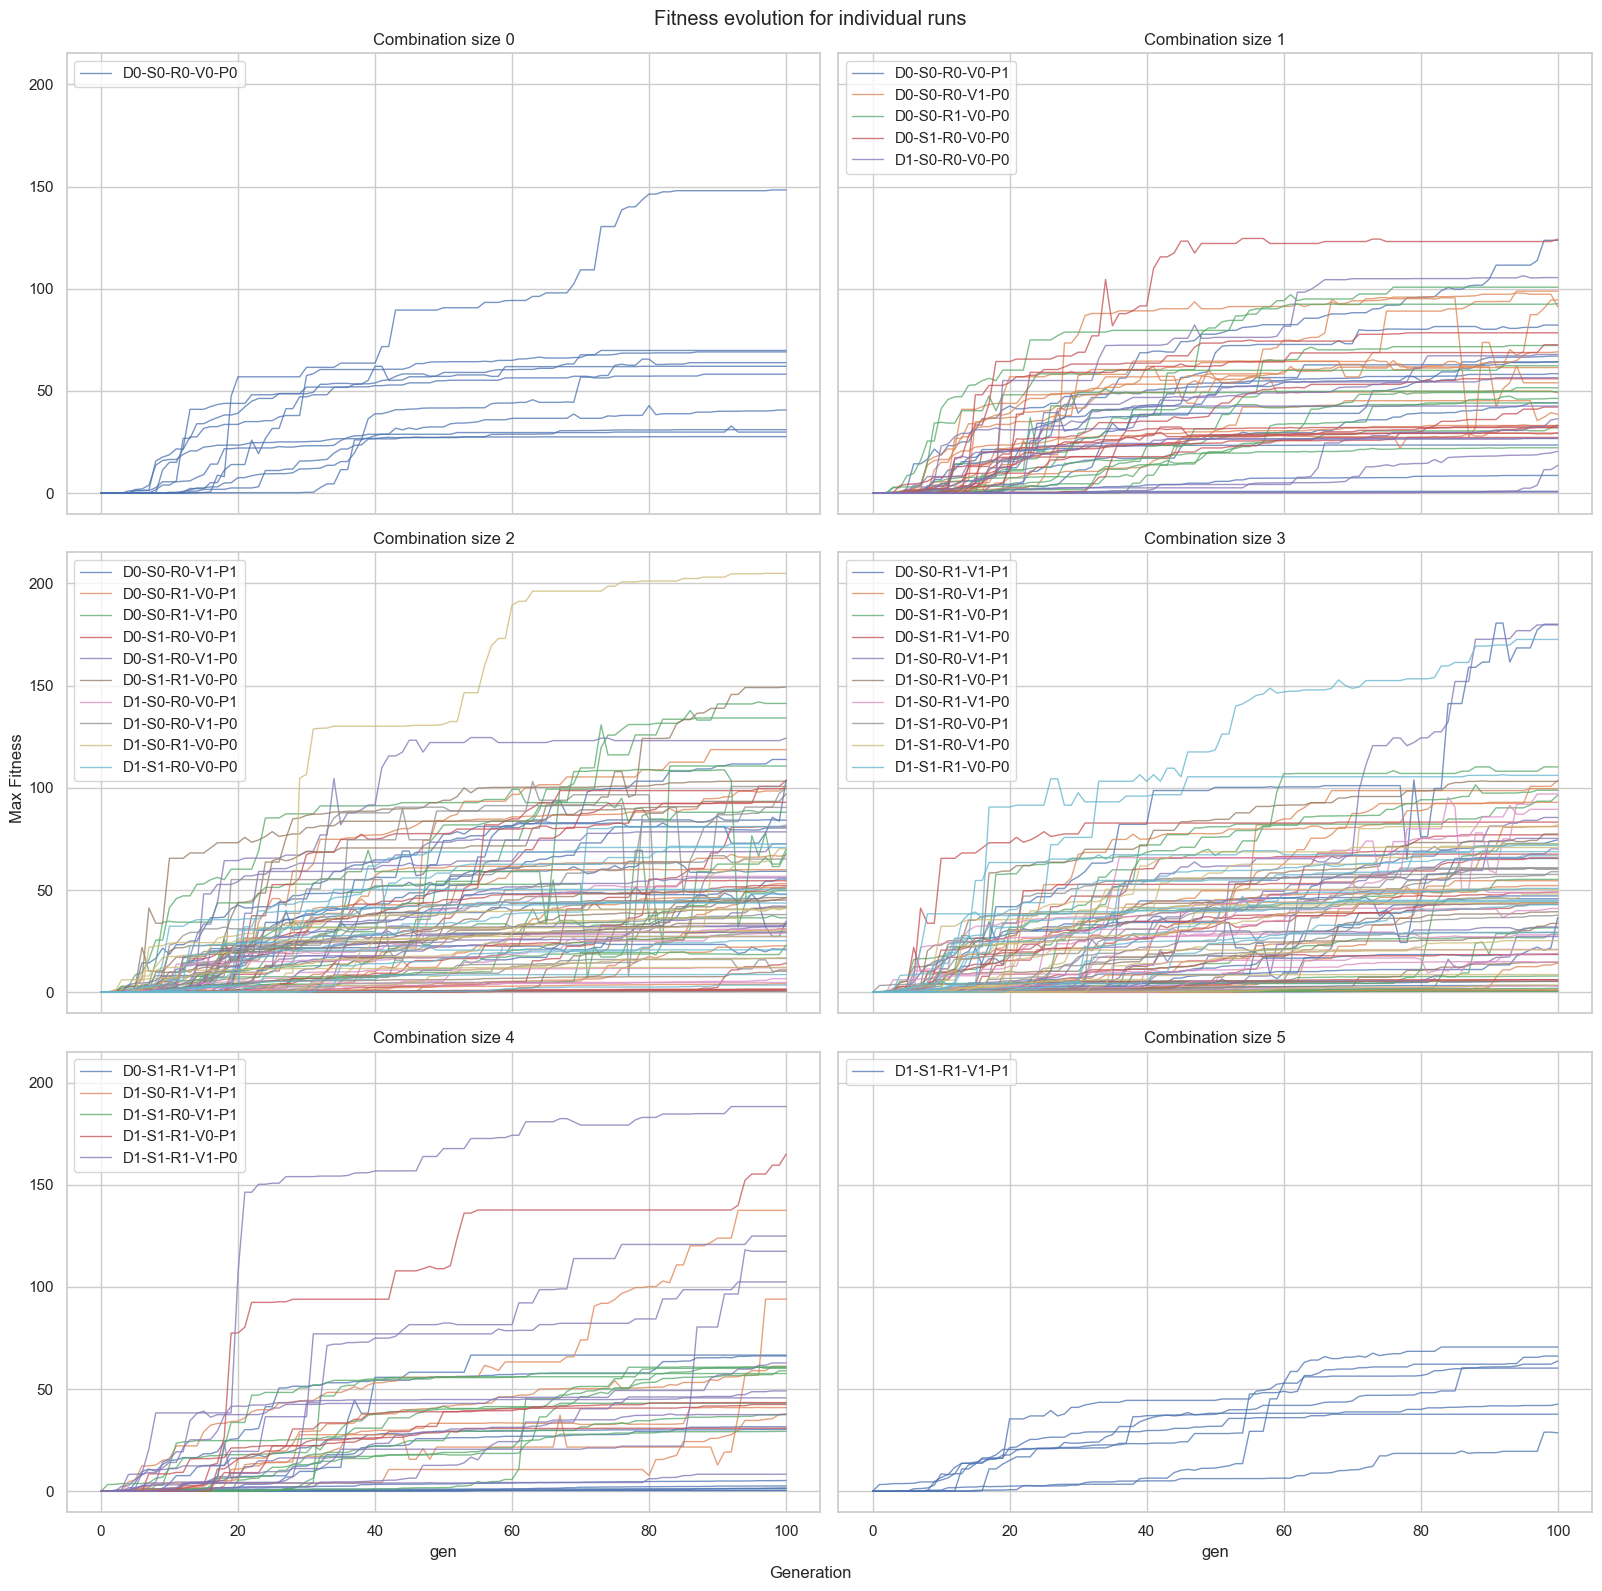

In [17]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(3, 2, figsize=(16, 16), sharey=True, sharex=True)
axs = axs.flatten()

for i, (comb_size, ax) in enumerate(zip(comb_sizes, axs)):
    sns.lineplot(x="gen", y="max", hue="group", data=results_df[results_df.comb_size == i], units="run_idx", estimator=None, lw=1, ax=ax, legend=True, alpha=0.75)
    ax.legend(loc='upper left')
    ax.set_title(f"Combination size {comb_size}")
    ax.set_ylabel("")

fig.text(0.5, 0, 'Generation', ha='center')
fig.text(0, 0.5, 'Max Fitness', va='center', rotation='vertical')
plt.suptitle("Fitness evolution for individual runs")
plt.tight_layout()
plt.show()

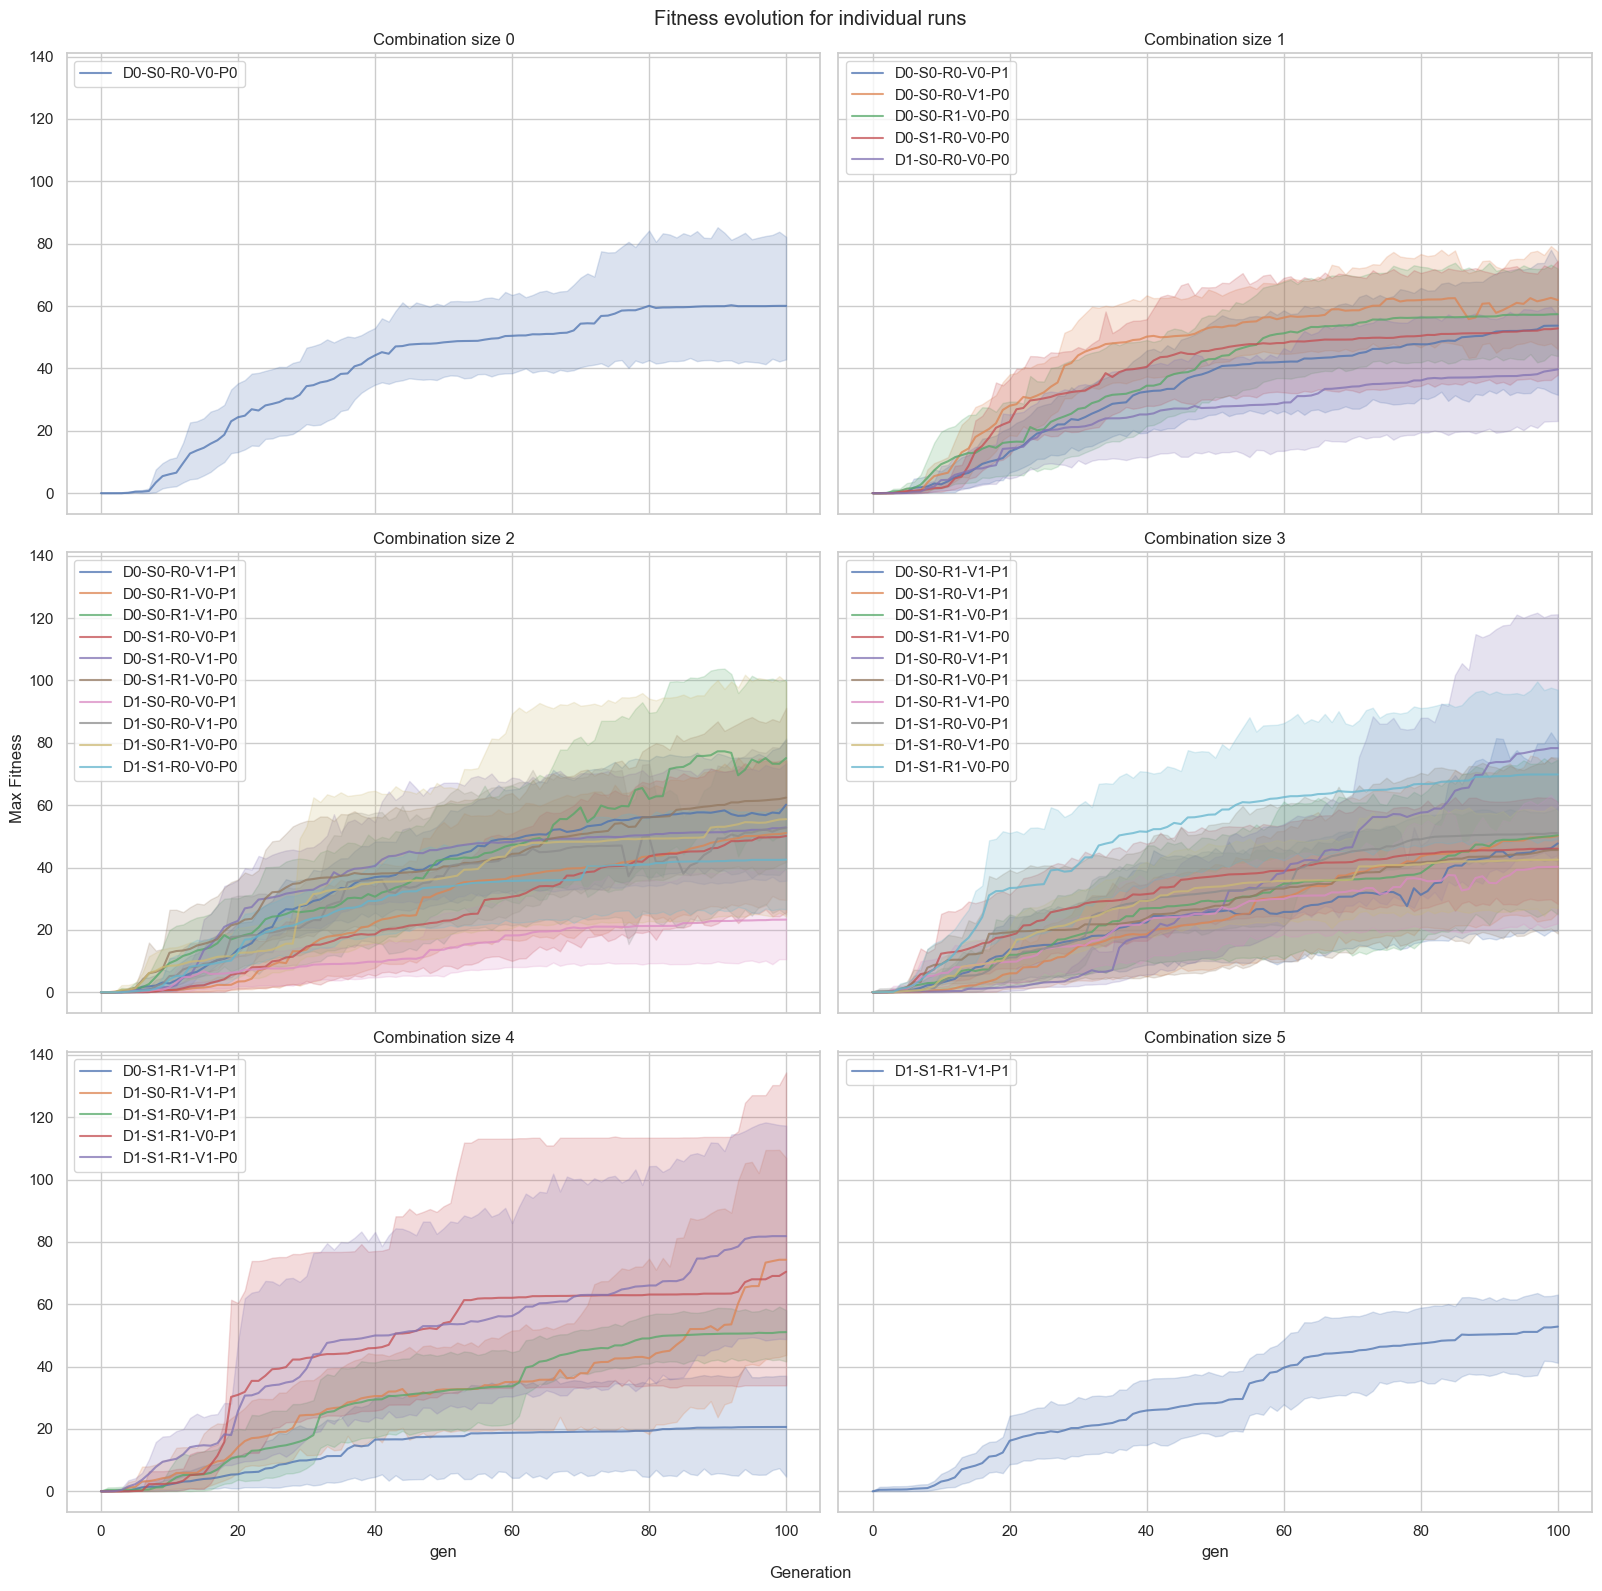

In [18]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(3, 2, figsize=(16, 16), sharey=True, sharex=True)
axs = axs.flatten()

for i, (comb_size, ax) in enumerate(zip(comb_sizes, axs)):
    sns.lineplot(x="gen", y="max", hue="group", data=results_df[results_df.comb_size == i], ax=ax, legend=True, alpha=0.75)
    ax.legend(loc='upper left')
    ax.set_title(f"Combination size {comb_size}")
    ax.set_ylabel("")

fig.text(0.5, 0, 'Generation', ha='center')
fig.text(0, 0.5, 'Max Fitness', va='center', rotation='vertical')
plt.suptitle("Fitness evolution for individual runs")
plt.tight_layout()
plt.show()

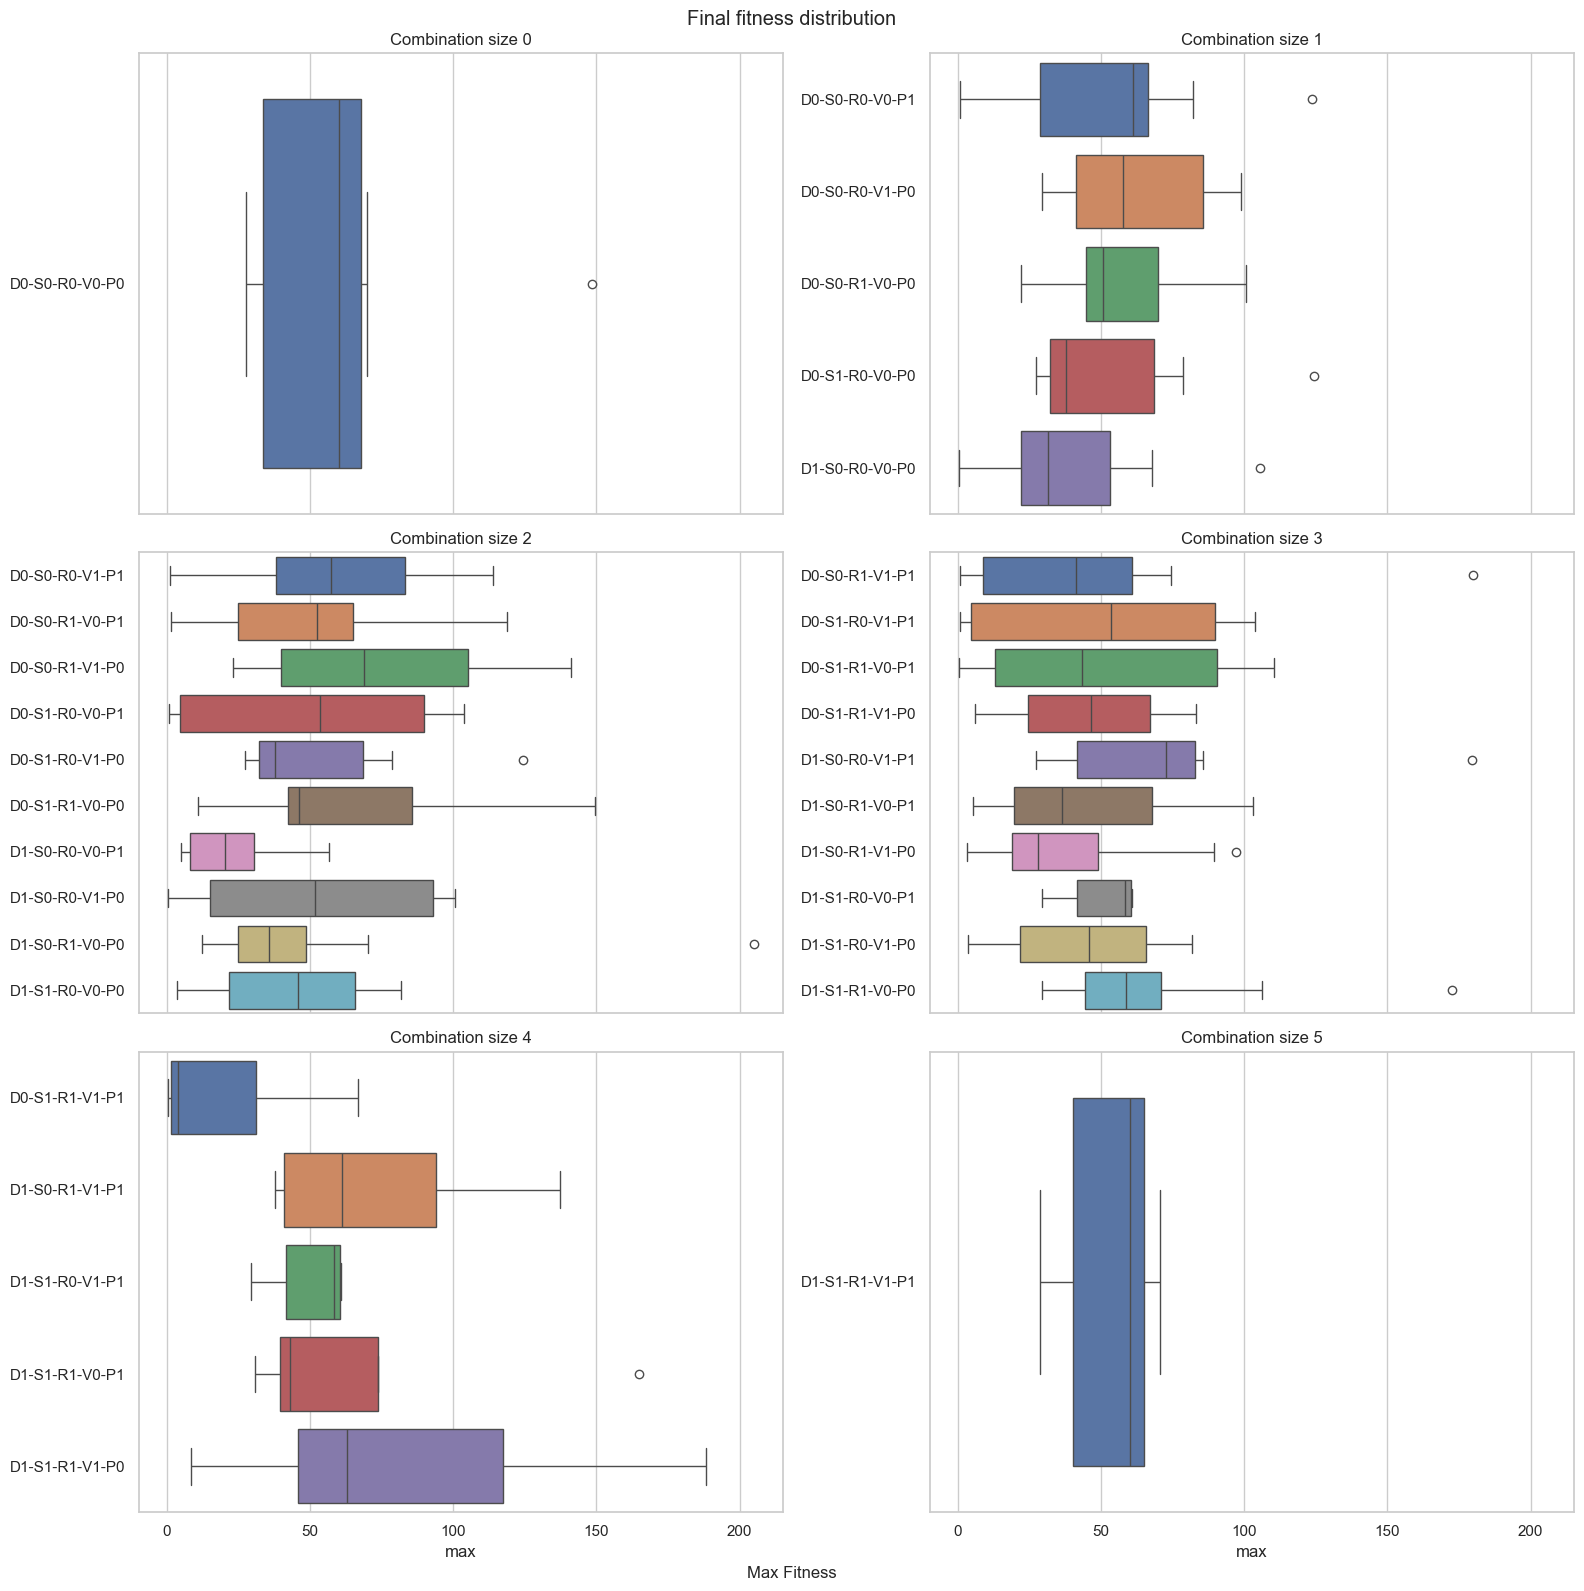

In [19]:
fig, axs = plt.subplots(3, 2, figsize=(16, 16), sharey=False, sharex=True)
axs = axs.flatten()

for i, (comb_size, ax) in enumerate(zip(comb_sizes, axs)):
    subset = end_results[end_results.comb_size == i]
    sns.boxplot(x="max", y="group", hue="group", data=subset, ax=ax)
    ax.set_title(f"Combination size {comb_size}")
    ax.set_ylabel("")

fig.text(0.5, 0, 'Max Fitness', ha='center')
plt.suptitle("Final fitness distribution")
plt.tight_layout()
plt.show()

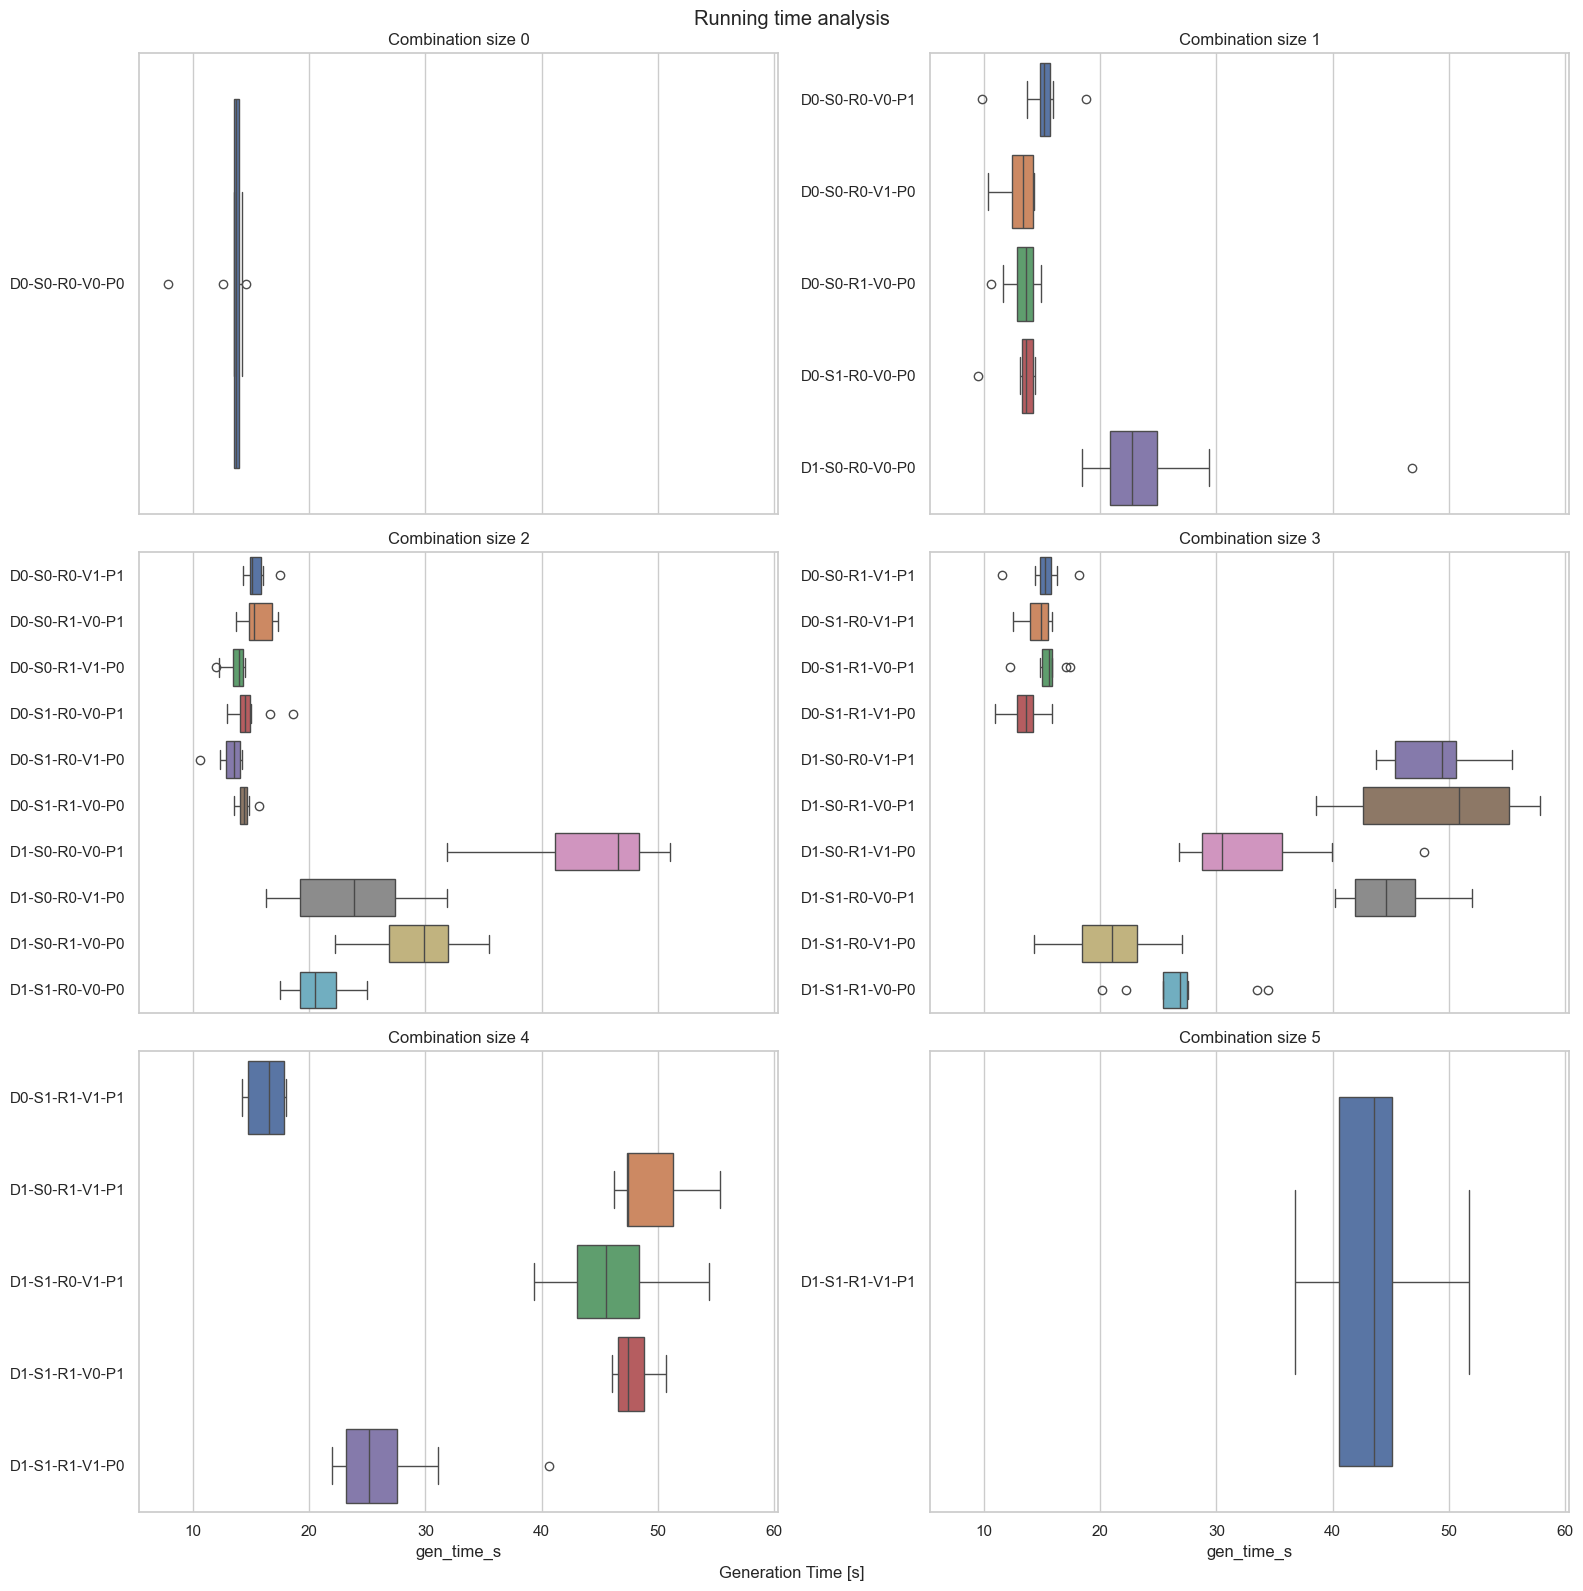

In [20]:
fig, axs = plt.subplots(3, 2, figsize=(16, 16), sharey=False, sharex=True)
axs = axs.flatten()

for i, (comb_size, ax) in enumerate(zip(comb_sizes, axs)):
    subset = end_results[end_results.comb_size == i]
    sns.boxplot(x="gen_time_s", y="group", hue="group", data=subset, ax=ax)
    ax.set_title(f"Combination size {comb_size}")
    ax.set_ylabel("")

fig.text(0.5, 0, 'Generation Time [s]', ha='center')
plt.suptitle("Running time analysis")
plt.tight_layout()
plt.show()